<a href="https://colab.research.google.com/github/2303A52479/GEN-AI-LAB/blob/main/GEN_AI_LAB_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9179 - loss: 0.2718 - val_accuracy: 0.9845 - val_loss: 0.0466
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9867 - loss: 0.0437 - val_accuracy: 0.9863 - val_loss: 0.0389
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 33ms/step - accuracy: 0.9914 - loss: 0.0270 - val_accuracy: 0.9867 - val_loss: 0.0383
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9928 - loss: 0.0220 - val_accuracy: 0.9902 - val_loss: 0.0293
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 33ms/step - accuracy: 0.9953 - loss: 0.0144 - val_accuracy: 0.9891 - val_loss: 0.0316
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.9973 - loss: 0.0088 - val_accuracy: 0.9895 - val_loss: 0.0338
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9977 - loss: 0.0074 - val_accuracy: 0.9872 - val_loss: 0.0469
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9976 -

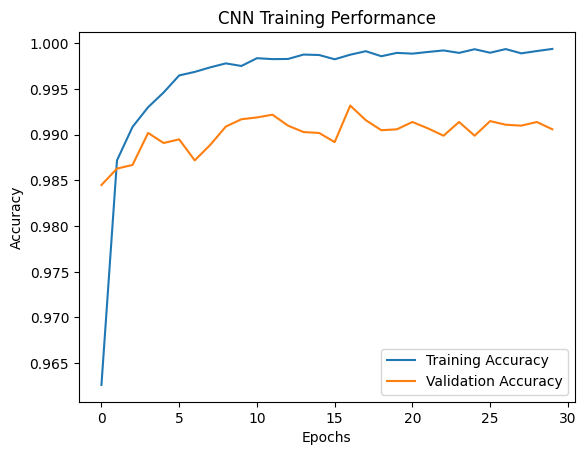

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")



plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training Performance')
plt.show()